# **PROJET : FRAUD**

**Sommaire :**   
- Préparation du jeu de données
- Exploration et Statistiques descriptives
- Data processing
- Visualisation (Matplotlib)
- Machine learning
- Conclusion



---



**Objectif :** *Prédire si une transaction est frauduleuse*

## **I-** Préparation du jeu de données :

Audit et exploration des données



### Chargement du jeu de données et desciption

> Description du dataframe et des variables



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score , cross_validate , StratifiedKFold,KFold
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score, balanced_accuracy_score,mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

# Importer les données du fichier Fraud.csv dans un DataFrame
dfTransaction = pd.read_csv('https://assets-datascientest.s3-eu-west-1.amazonaws.com/de/total/fraud.csv')

# Afficher un aperçu des transactions (10 premières lignes)
dfTransaction.head(10)


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud
0,22058,2015-02-24 22:55:49,2015-04-18 2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 7:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
5,159135,2015-05-21 6:03:03,2015-07-09 8:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0
6,50116,2015-08-01 22:40:52,2015-08-27 3:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0
7,360585,2015-04-06 7:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0


In [2]:
# Affichage des dimensions du DataFrame dfTransaction
print(dfTransaction.shape)

(151112, 11)


In [3]:
# Description du dataframe
dfTransaction.describe()

,user_id,purchase_value,age,ip_address,is_fraud
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [4]:
dfTransaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  is_fraud        151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


### Data cleaning : Nettoyage des Données et Gestion des NAs :

> Repérer et supprimer les doublons.
>
> Modifier les éléments et leur type (construction de telle variable, replace, rename et astype).
>
> Détecter les NA (nombre de valeurs manquantes, isna suivie des méthodes any et sum).
>
> Les remplacer (stratégie de remplacement : fillna et des méthodes statistiques).
>
> Les supprimer grâce à la méthode dropna.
>
> Recréer des variables temporelles


In [5]:
# Affichage de la somme des doublons >>> Pour calculer la somme des booléens, on considère que True vaut 1 et False vaut 0.
print(dfTransaction.duplicated().sum())


0


In [6]:
# On détecte les COLONNES contenant au moins une valeur manquante
dfTransaction.isna().any(axis = 0).sum()

# Aucune valeures manquantes dans les COLONNES 

0

In [7]:
# On détecte les LIGNES contenant au moins une valeur manquante
dfTransaction.isna().any(axis = 1).sum()

# Aucune valeures manquantes dans les LIGNES 

0

**-> On constate qu'il n'y a aucune valeur manquante dans le dataFrame**


In [8]:
dfTransaction.dtypes

#On affiche les differents types

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
is_fraud            int64
dtype: object

In [9]:
# Création de la variable time_diff = différence entre l'heure de la connextion et l'heure d'achat
dfTransaction['signup_time'] = pd.to_datetime(dfTransaction['signup_time'])
dfTransaction['purchase_time'] = pd.to_datetime(dfTransaction['purchase_time'])
dfTransaction['time_diff']=(dfTransaction['purchase_time']-dfTransaction['signup_time']).astype('timedelta64[m]')
dfTransaction.head(10)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud,time_diff
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,75111.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,299.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,8201.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,72691.0
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0,70682.0
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0,36297.0
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0,71145.0
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0,59903.0
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0,82395.0


Le champ time_diff pourra représenter les deux champs signup_time et purchase_time dans notre modèle.

## **II-** Exploration et Statistiques descriptives :

> Explorer le jeu de données

In [10]:
# Répartition des browsers dans le jeu de données
browser_count = dfTransaction['browser'].value_counts()
browser_count

Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: browser, dtype: int64

In [11]:
# Repartition achat frauduleux et non frauduleux par browser 
nb_isnot_fraud = lambda is_fraud: is_fraud[is_fraud == 0].value_counts()
nb_is_fraud = lambda is_fraud: is_fraud[is_fraud == 1].value_counts()

functions_to_apply = {
    'is_fraud' : [nb_isnot_fraud, nb_is_fraud]
}

is_fraud_groupby = dfTransaction.groupby('browser').agg(functions_to_apply)

is_fraud_groupby.columns.set_levels(['nb_isnot_fraud', 'nb_is_fraud'], level=1, inplace = True)

is_fraud_groupby.head()

C:\Users\maoua\AppData\Local\Temp\ipykernel_10028\3684777715.py:11: FutureWarning: inplace is deprecated and will be removed in a future version.
  is_fraud_groupby.columns.set_levels(['nb_isnot_fraud', 'nb_is_fraud'], level=1, inplace = True)


is_fraud            
        nb_isnot_fraud nb_is_fraud
browser                           
Chrome           55363        6069
FireFox          22268        2342
IE               33540        3187
Opera             3348         328
Safari           22442        2225

In [12]:
# Proportion (pourcentage) des fraudes par navigateur
dfTransaction.groupby('browser').agg(nombre=('is_fraud', 'size'), percentage_fraud=('is_fraud', 'mean'))

,nombre,percentage_fraud
browser,,
Chrome,61432,0.098792
FireFox,24610,0.095165
IE,36727,0.086775
Opera,3676,0.089227
Safari,24667,0.090201


On constate qu'il y a légèrement plus de fraudes sur Chrome même si ce n'est pas très significatif par rapport aux autres navigateurs. La répartition est assez partagée.

In [13]:
# Crosstab (répartition des fraudes/pas fraudes par browser)
table = pd.crosstab(dfTransaction.browser, dfTransaction.is_fraud)
table

is_fraud,0,1
browser,,
Chrome,55363,6069
FireFox,22268,2342
IE,33540,3187
Opera,3348,328
Safari,22442,2225


In [14]:
# table de contingence (indépendance entre elles des variables browser et is_fraud)
from scipy.stats import chi2_contingency

resultats_test = chi2_contingency(table)
statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique, p_valeur, degre_liberte)

# p-value < 5% donc on rejette (H0 : "les deux variables browser et is_fraud sont indépendantes")

44.556571734650184 4.916028350364759e-09 4


In [15]:
# V_Cramer (vérification browser / is_fraud)
import numpy as np 
def V_Cramer(table3, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(table, dfTransaction.shape[0])

#Le V_Cramer n'est pas très élevé.
#On en déduit qu'il n'y a pas une forte corrélation entre les deux variables browser et is_fraud.

0.016382585261164186

In [16]:
# Application de ANNOVA (vérification age / is_fraud)
import statsmodels.api 

result = statsmodels.formula.api.ols('age ~ is_fraud', data=dfTransaction).fit()
table2 = statsmodels.api.stats.anova_lm(result)

table2

#la p-value (PR(>F)) est inférieur à 5% donc on peut dire que l'age influe sur is_fraud.

,df,sum_sq,mean_sq,F,PR(>F)
is_fraud,1.0,4.923416e+02,492.341625,6.629742,0.01003
Residual,151110.0,1.122182e+07,74.262564,NaN,NaN


In [17]:
# voir si on a des identifiants (utilisateur, poste, addresse ip) qui se répètent
dfTransaction.nunique()

user_id           151112
signup_time       151112
purchase_time     150679
purchase_value       122
device_id         137956
source                 3
browser                5
sex                    2
age                   58
ip_address        143511
is_fraud               2
time_diff          97895
dtype: int64

**On remarque que certains appareils ont fait plus de transactions que 
d'autres (leurs nombre est inférieur au nombre total des lignes du dataframe). Cela peut aussi être un indicateur de fraudes. Idem pour les addresses IP.**

In [18]:
# proportion de la fraude entre homme et femme
dfTransaction.groupby('sex').agg(nombre=('is_fraud', 'size'), percentage_fraud =('is_fraud', 'mean'))

,nombre,percentage_fraud
sex,,
F,62819,0.091007
M,88293,0.095523


On constate que les fraudes sont légèrement plus d'origine masculine que féminine.

## **III-** Data processing :

Transformer les varibales catégorielles pour les préparer au Machine Learning qui suivra.


In [19]:
# Transformation des varibales catégorielles
dfTransact = pd.get_dummies(dfTransaction, columns=['source','sex', 'browser'])
dfTransact.head(10)

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,is_fraud,time_diff,source_Ads,source_Direct,source_SEO,sex_F,sex_M,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,39,7.327584e+08,0,75111.0,0,0,1,0,1,1,0,0,0,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,53,3.503114e+08,0,299.0,1,0,0,1,0,1,0,0,0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,53,2.621474e+09,1,0.0,0,0,1,0,1,0,0,0,1,0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,41,3.840542e+09,0,8201.0,0,0,1,0,1,0,0,0,0,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,45,4.155831e+08,0,72691.0,1,0,0,0,1,0,0,0,0,1
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,18,2.809315e+09,0,70682.0,1,0,0,0,1,1,0,0,0,0
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,19,3.987484e+09,0,36297.0,1,0,0,1,0,1,0,0,0,0
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,34,1.692459e+09,0,71145.0,1,0,0,0,1,0,0,0,1,0
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,43,3.719094e+09,0,59903.0,0,0,1,1,0,0,0,1,0,0
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,31,3.416747e+08,0,82395.0,1,0,0,0,1,0,0,1,0,0


## **IV-** Visualisation   

Visualiser certaines variables en fonction d'autres afin d'en comprendre aux mieux les corrélations et en détecter celles qui seraient les plus liées à des transactions frauduleuses.

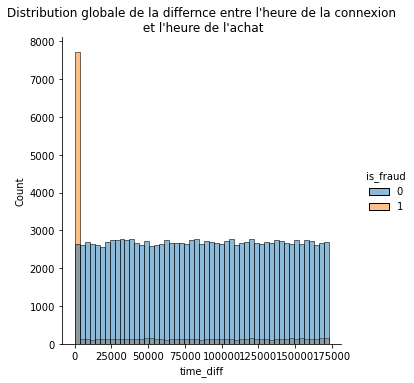

In [20]:
# Visualisation de time_diff en fonction de is_fraud
title = 'Distribution globale de la differnce entre l\'heure de la connexion\n et l\'heure de l\'achat'
sns.displot(data=dfTransaction, x=dfTransaction['time_diff'], hue=dfTransaction['is_fraud'])
plt.title(title)
plt.show()

**On peut constater que les transactions de très courtes durées (temps entre moment d'achat et moment de connexion) seront considérées comme frauduleuses.**  

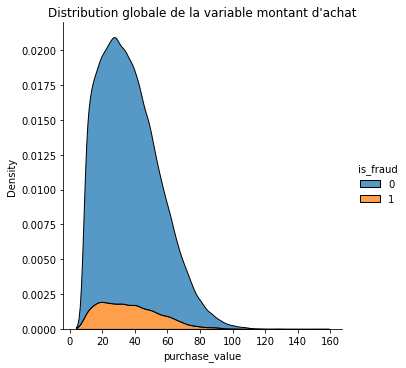

In [21]:
# Purchase_value en fonction de is_fraud
sns.displot(data=dfTransaction, x=dfTransaction['purchase_value'], hue=dfTransaction['is_fraud'], kind="kde", multiple="stack")
plt.title('Distribution globale de la variable montant d\'achat')
plt.show()

L'évolution de la valeur d'achat est similaire à celle des transactions qu'elles soient frauduleuses ou non.

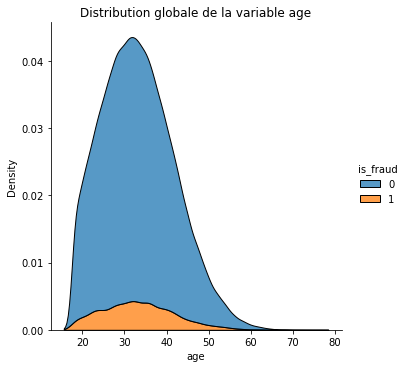

In [22]:
# Purchase_value en fonction de is_fraud
sns.displot(data=dfTransaction, x=dfTransaction['age'], hue=dfTransaction['is_fraud'], kind="kde", multiple="stack")
plt.title('Distribution globale de la variable age')
plt.show()

On constate la même chose pour l'âge.

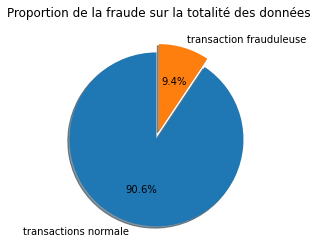

In [23]:
# Répartition de la fraude sur l'ensemble des données
fraud_val = dfTransaction.is_fraud.value_counts(sort = True, ascending = False)
labels = ('transactions normale','transaction frauduleuse')
fig1, ax1 = plt.subplots()
explode = (0.1, 0) 
ax1.pie(fraud_val.values,explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Proportion de la fraude sur la totalité des données')
plt.show()

Les transactions frauduleuses constituent à peu près 10% de l'ensemble des achats.

<AxesSubplot:xlabel='browser', ylabel='is_fraud'>

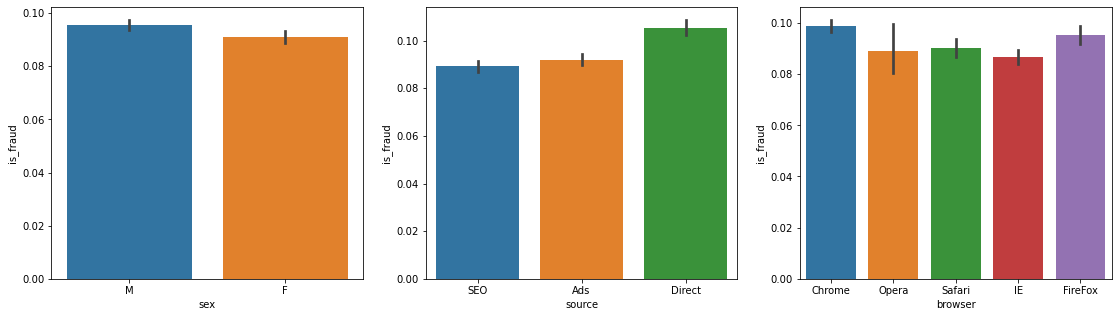

In [24]:
# Barres sex, age, browser
fig, ax = plt.subplots(1,3,figsize=(19,5))
sns.barplot(x='sex', y='is_fraud', data=dfTransaction, ax=ax[0])

sns.barplot(x='source', y='is_fraud', data=dfTransaction, ax=ax[1])

sns.barplot(x='browser', y='is_fraud', data=dfTransaction, ax=ax[2])

On constate que la répartition de la fraude est similaire indépendamment du sexe, de la source ou du browser.

## **V-**  Machine learning    

Entraîner et évaluer les modèles de classification.



### Application des modèles de classification (Régression logistique) avant oversamling

> Préparer les données en séparant les variables explicatives de la variable cible.
>
> Séparer le jeu de données en deux : un jeu d'entraînement et un jeu de test.
>
> Instancier le(s) modèle(s).
>
> Entrainer le(s) modèle(s) : model.fit(X_train, y_train).
>
> Prédir : model.predict(X_test, y_test).

In [25]:
# Drop pour ne garder que les variables explicatives à faire appliquer au modèle
dfTransactTemp = dfTransact.drop(['signup_time', 'purchase_time', 'device_id','user_id', 'ip_address'], axis = 1)
dfTransactTemp.head()

,purchase_value,age,is_fraud,time_diff,source_Ads,source_Direct,source_SEO,sex_F,sex_M,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari
0,34,39,0,75111.0,0,0,1,0,1,1,0,0,0,0
1,16,53,0,299.0,1,0,0,1,0,1,0,0,0,0
2,15,53,1,0.0,0,0,1,0,1,0,0,0,1,0
3,44,41,0,8201.0,0,0,1,0,1,0,0,0,0,1
4,39,45,0,72691.0,1,0,0,0,1,0,0,0,0,1


**Nous remarquons que les variables ne sont pas standadisées (age, purchase_value, time_diff par rapport au reste).** Trop d'écart entre les max et les min.   

**Nous allons donc standardiser les données à l'aide de MinMaxScaler**

In [26]:
# define min max scaler
scaler = MinMaxScaler()

# transform data
dfTransactScaler = pd.DataFrame(scaler.fit_transform(dfTransactTemp.values), index=dfTransactTemp.index, columns=dfTransactTemp.columns)
dfTransactScaler.head()

,purchase_value,age,is_fraud,time_diff,source_Ads,source_Direct,source_SEO,sex_F,sex_M,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari
0,0.172414,0.362069,0.0,0.434673,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.048276,0.603448,0.0,0.001730,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.041379,0.603448,1.0,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.241379,0.396552,0.0,0.047460,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.206897,0.465517,0.0,0.420668,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


On procède maintenant à la séparation des variables explicatives de la variable cible.

In [27]:
# Instanciation du dataframe contenant les variables explicatives
X = dfTransactScaler.drop(['is_fraud'], axis = 1)

# Instanciation de la series contenant la variable cible 
y = dfTransactScaler['is_fraud']
X.head(10)

,purchase_value,age,time_diff,source_Ads,source_Direct,source_SEO,sex_F,sex_M,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari
0,0.172414,0.362069,0.434673,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.048276,0.603448,0.001730,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.041379,0.603448,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.241379,0.396552,0.047460,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.206897,0.465517,0.420668,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,0.227586,0.000000,0.409042,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
6,0.013793,0.017241,0.210053,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.124138,0.275862,0.411721,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,0.144828,0.431034,0.346663,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.365517,0.224138,0.476826,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Séparer le jeu de données en deux (un jeu d'entraînement et un jeu de test) (train_test_split).

In [28]:

# On applique la fonction train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30, random_state=42)

# On affiche les dimensions des datasets après avoir appliquer la fonction 
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

# On affiche les dimensions de y_train
print('\nles dimensions de y_train :')
y_train.value_counts()

(105778, 13) (45334, 13) (105778,) (45334,)

les dimensions de y_train :


0.0    95844
1.0     9934
Name: is_fraud, dtype: int64

Instancier le modèle, l'entrainer et prédir la target y_pred.

In [29]:
# On instantie le modèle et on l'entraîne 
model_log=LogisticRegression(solver="newton-cg").fit(X_train,y_train)

# On prédit les y à partir de X_test
y_pred=model_log.predict(X_test)

# On affiche les coefficients obtenus
coeff=model_log.coef_

# On affiche la constante
intercept=model_log.intercept_

# On calcule les odd ratios
odd_ratios=np.exp(model_log.coef_)

# On crée un dataframe qui combine à la fois variables, coefficients et odd-ratios
resultats=pd.DataFrame(X.columns, columns=["Variables"])
resultats['Coefficients']=model_log.coef_.tolist()[0]
resultats['Odd_Ratios']=np.exp(model_log.coef_).tolist()[0]
resultats

,Variables,Coefficients,Odd_Ratios
0,purchase_value,0.007942,1.007974
1,age,0.187304,1.205994
2,time_diff,-3.527382,0.029382
3,source_Ads,-0.038659,0.962078
4,source_Direct,0.117851,1.125077
5,source_SEO,-0.079192,0.923862
6,sex_F,-0.028218,0.972177
7,sex_M,0.028218,1.028619
8,browser_Chrome,0.059739,1.061559
9,browser_FireFox,0.043175,1.044121


Interprétation des odd-ratio significatives :  

1) **time_diff** : Lorsque la variable time_diff augmente de 3 fois alors cela diminue les chances d'appartenir à la classe positive d'environ 30 fois.
=> ce qui implique inversement que si time_diff diminue fortement cela fait augmenter les chances d'appartenir aux transactions frauduleuses. Ce qui confirme le graphique 'Distribution globale de la differnce entre l'heure de la connexion et l'heure de l'achat'.

2) **age** : Lorsque la variable age augmente de 19% alors cela augmente les chances d'appartenir à la classe positive d'environ 21%. Cette évolution sous-jacente de la fraude en fonction de l'age a aussi été constatée via le graphe 'Distribution globale de la variable age'.

In [30]:
# On calcule la matrice de confusion et on l'affiche
print("\n Matrice de confusion :\n", confusion_matrix(y_test,y_pred))


 Matrice de confusion :
 [[41117     0]
 [ 4217     0]]


La matrice de confusion est déséquilibrée vu qu'il n'y a ni de vrais positifs ni de faux positifs.

In [31]:
# On affiche le recall_score du modèle 
print("recall_score :", recall_score(y_test, y_pred))
# un recall_score de 0 ce qui n'est pas interprétable vu notre jeu de données.

recall_score : 0.0


On remarque que y_train contient presque 10 fois plus de négatif que de postif. Ce déséquilibre de classes incite à effectuer un resampling (oversampling) pour ainsi rééquilibrer le jeu d'entrainement.

### Application du modèles de classification après oversamling


On a constaté un déséquilibre entre classes négatives et positives ce qui nous incite à appliquer un oversampling.

> Balancer le jeu de données (oversampling)


In [32]:
# Oversampling : la solution pour résoudre le problème du déséquilibre des classes 
# consiste à rééchantillonner de manière aléatoire l'ensemble de données
# d'apprentissage
# Random Oversampling : duplique des exemples de la classe minoritaire dans l'ensemble de données d'apprentissage
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
y_train.value_counts()

0.0    95844
1.0    95844
Name: is_fraud, dtype: int64

In [33]:
# On réapplique le modèle et on l'entraîne 
model_log=LogisticRegression(solver="newton-cg").fit(X_train,y_train)

# On prédit les y à partir de X_test
y_pred=model_log.predict(X_test)

In [34]:
# On calcule la matrice de confusion et on l'affiche
print("\n Matrice de confusion :\n", confusion_matrix(y_test,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("\n Vrais négatifs:",tn,"\n Faux positifs:",fp,"\n Faux négatifs:",fn,"\n Vrais positifs:",tp)


 Matrice de confusion :
 [[26565 14552]
 [ 1257  2960]]

 Vrais négatifs: 26565 
 Faux positifs: 14552 
 Faux négatifs: 1257 
 Vrais positifs: 2960


**Ce qui nous intéresse ici ce sont les faux négatifs (les transactions frauduleuses qui passent pour non frauduleuses) et c'est ce qui va déterminer notre choix par rapport aux modèles que l'on appliquera.**

In [35]:
# Accuracy : On affiche l'accuracy du modèle 
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.6512771871001897


> Nous obtenons une accuracy de 0.65, ce qui ne reflète pas de bonnes performances pour notre modèle.  
Regardons avec le recall_score : 

In [36]:
print("recall_score :", recall_score(y_test, y_pred))
# Notre véritable mesure devrait être recall_score car nous pouvons nous permettre de classer 
# une transaction non frauduleuse comme frauduleuse, mais pas l'inverse.

recall_score : 0.7019207967749586



### Appliquer le modèle Arbre de décision



In [37]:
### Essayons aussi l'arbre de décision pour avoir une autre perspective.
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred2 = dtc.predict(X_test)

In [38]:
print('accuracy_score from DecisionTreeClassifier :', accuracy_score(y_test, y_pred2))


accuracy_score from DecisionTreeClassifier : 0.9037587682534081


> Un accuracy score meilleur, mais quid du recall_score ?

In [39]:
print('recall_score from DecisionTreeClassifier :', recall_score(y_test, y_pred2))


recall_score from DecisionTreeClassifier : 0.5719705952098648


Quid du f1_score ?

In [40]:
print('f1_score from DecisionTreeClassifier :' , f1_score(y_test, y_pred2))

f1_score from DecisionTreeClassifier : 0.525089800805486


> On constate un meilleur accuracy mais un recall_score légèrement plus bas.  

Matrice de confusion : 


In [41]:
print('confusion_matrix from DecisionTreeClassifier:\n', confusion_matrix(y_test, y_pred2))

confusion_matrix from DecisionTreeClassifier:
 [[38559  2558]
 [ 1805  2412]]


**On constate que les faux négatifs ont néanmoins augmenté. Les faux positifs ont quant à eux nettement diminué.**

### Appliquer le modèle Random Forest Classifier


In [42]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred3 = rfc.predict(X_test)

In [43]:
print('accuracy_score from RandomForestClassifier :', accuracy_score(y_test, y_pred3))


accuracy_score from RandomForestClassifier : 0.9264569638681784


In [44]:
print('recall_score from RandomForestClassifier :', recall_score(y_test, y_pred3))


recall_score from RandomForestClassifier : 0.5598766895897558


In [45]:
print('f1_score from RandomForestClassifier :' , f1_score(y_test, y_pred3))


f1_score from RandomForestClassifier : 0.586146971201589


In [46]:
print('confusion_matrix from RandomForestClassifier: \n', confusion_matrix(y_test, y_pred3))

confusion_matrix from RandomForestClassifier: 
 [[39639  1478]
 [ 1856  2361]]


> **Nous choisirons finalement la régression logistique car les faux négatifs sont minimes dans ce cas.**


### Validation croisée   
Nous allons soumlettre notre modèle de régression logistique aux évaluations des performances et ce via une validation croisée :   

In [47]:
from sklearn.model_selection import cross_val_score

performances_ = cross_val_score(model_log, X, y, cv=5, scoring='accuracy')

from sklearn.model_selection import StratifiedKFold

folds_1 = StratifiedKFold(n_splits = 5, shuffle = False)

folds_2 = StratifiedKFold(n_splits = 5, shuffle = True, random_state=42)

performances_non_shuffled = cross_val_score(model_log, X, y, scoring='accuracy', cv=folds_1)

performances_shuffled = cross_val_score(model_log, X, y, scoring='accuracy', cv=folds_2)

print(" Les performances obtenues sur chacun des splits est de:\n\n", performances_, "\n\nEn moyenne cela donne donc une accuracy de:",np.mean(performances_),
      " \n\n Les performances obtenues sur chacun des splits avec un découpage successif des folds (Stratified-KFold) sans mélange est de:\n\n", performances_non_shuffled,"\n\nEn moyenne cela donne donc une accuracy de:",np.mean(performances_non_shuffled),
      "\n\n Les performances obtenues sur chaque des splits après un mélange des observations de la base est de:\n\n", performances_shuffled, "\n\nEn moyenne cela donne donc une accuracy de:",np.mean(performances_shuffled))

print("\nOn constate que les performances sont quasi équivalentes lorsque l'on mélange les observations et lorsqu'on ne les mélange pas.") 

c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line se

 Les performances obtenues sur chacun des splits est de:

 [0.9063627  0.90632962 0.90635961 0.90635961 0.90635961] 

En moyenne cela donne donc une accuracy de: 0.9063542274348461  

 Les performances obtenues sur chacun des splits avec un découpage successif des folds (Stratified-KFold) sans mélange est de:

 [0.9063627  0.90632962 0.90635961 0.90635961 0.90635961] 

En moyenne cela donne donc une accuracy de: 0.9063542274348461 

 Les performances obtenues sur chaque des splits après un mélange des observations de la base est de:

 [0.9063627  0.90632962 0.90635961 0.90635961 0.90635961] 

En moyenne cela donne donc une accuracy de: 0.9063542274348461

On constate que les performances sont quasi équivalentes lorsque l'on mélange les observations et lorsqu'on ne les mélange pas.


Interprétation graphique des performances :  


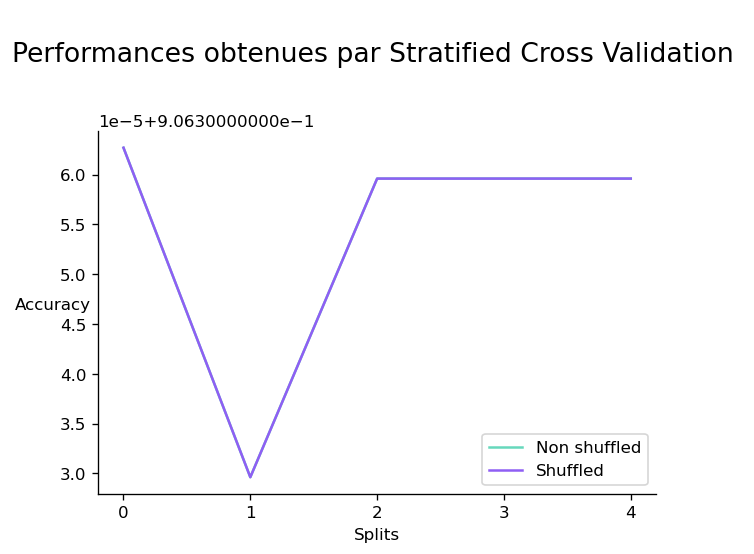

In [48]:
# On définit la qualité de l'affichage

fig,ax = plt.subplots(dpi=120)

# On retire l'axe supérieur et l'axe de droite du graphique

ax.spines['right'].set_visible(False)

ax.spines['top'].set_visible(False)

# On conserve les graduations de l'axe du bas et de gauche

ax.yaxis.set_ticks_position('left') 

ax.xaxis.set_ticks_position('bottom') 

# On nomme les axes 

plt.xlabel("Splits")

plt.ylabel("Accuracy", rotation=0)

# On affiche les performances issues du dataset non mélangé

plt.plot(performances_non_shuffled,label="Non shuffled",color="#66d8bc")

# On affiche les performances issues du dataset  mélangé

plt.plot(performances_shuffled,label="Shuffled",color="#8f5ef4")

# On définit les graduations de l'axe des abscisses pour que ce soit des entiers 

plt.xticks(np.arange(0, 5, step=1))

# On affiche la légende des courbes 

plt.legend(loc=0)

# On affiche le titre du graphique

plt.title("\nPerformances obtenues par Stratified Cross Validation \n\n",fontsize=16);

# Le graphique permet de visualiser l'homogénéité parfaite des performances obtenues avant et après mélange.

## **VI**- Conclusion   

Au sein de ce projet nous avons utilisé plusieurs modèles :   
- un modèle de régression logistique LogisticRegression.
- un modèle d'arbres de décision DecisionTreeClassifier qui a donné une meilleure accuracy mais qui a le désavantage d'être moins interprétable.
- un modèle d'ensemble Learning RandomForestClassifier qui est tout comme le modèle précédent moins interprétable car il contient trop de faux négatifs par rapport aux deux autres.   

La problématique de déséquilibre de classes qu'on a rencontré en appliquant le modèle dans un premier temps nous a incité à appliquer un oversampling et de réentrainer le modèle pour avoir un résultat plus cohérent.

Le modèle LogisticRegression est le modèle de classification qui correspondrait le plus à notre problématique d'apprentissage supervisé car il prédit le moins de faux négatifs possibles.

In [49]:
from joblib import dump, load
dump(model_log, '../Model/LogisticRegression_model.joblib')
dump(dtc, '../Model/DecisionTreeClassifier_model.joblib')
dump(rfc, '../Model/RandomForestClassifier_model.joblib', compress=3)

['../Model/RandomForestClassifier_model.joblib']